# Exploratory Data Analysis

In [104]:
import pandas as pd

life_df = pd.read_csv('data/lifeexp.csv')
deprivation_df = pd.read_csv('data/deprivation.csv')

In [105]:
file_path = 'data/lifeexp.csv'
df = pd.read_csv(file_path)
print("Total columns:", len(df.columns))
print("\nAll column names:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head(5).to_string())

Total columns: 13

All column names:
['Males', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Females', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']

First 5 rows:
  Males Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  Unnamed: 6 Females Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12
0   age         mx         qx         lx         dx         ex         NaN     age         mx         qx          lx          dx          ex
1     0   0.004661   0.004651     100000      465.1      79.39         NaN       0   0.003684   0.003677      100000       367.7        83.3
2     1   0.000251   0.000251    99534.9       24.9      78.76         NaN       1   0.000209   0.000209     99632.3        20.9        82.6
3     2   0.000183   0.000183      99510       18.2      77.78         NaN       2   0.000139   0.000139     99611.4        13.8       81.62
4     3   0.000113   0.000113    99491.8       11.2       76.8   

In [106]:
print("Columns:", df.columns.tolist())
print("\nFemale side sample (columns 8-13):")
print(df.iloc[:5, 7:13].to_string(index=False))

print("df_females shape:", df_females.shape if 'df_females' in globals() else "Not created yet")
print(df_females.head(3) if 'df_females' in globals() else "N/A")

Columns: ['Males', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Females', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']

Female side sample (columns 8-13):
Females Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12
    age         mx         qx          lx          dx          ex
      0   0.003684   0.003677      100000       367.7        83.3
      1   0.000209   0.000209     99632.3        20.9        82.6
      2   0.000139   0.000139     99611.4        13.8       81.62
      3     0.0001     0.0001     99597.6         9.9       80.63
df_females shape: (101, 7)
   age        mx        qx        lx     dx     ex     sex
1    0  0.003684  0.003677  100000.0  367.7  83.30  Female
2    1  0.000209  0.000209   99632.3   20.9  82.60  Female
3    2  0.000139  0.000139   99611.4   13.8  81.62  Female


In [107]:
#extract male columns
male_cols = df.columns[0:6]
df_males = df[male_cols].copy()

df_males.columns = ['age', 'mx', 'qx', 'lx', 'dx', 'ex']

df_males['sex'] = 'Male'

#extract female columns 
female_cols = df.columns[7:13]
df_females = df[female_cols].copy()


df_females.columns = ['age', 'mx', 'qx', 'lx', 'dx', 'ex']

df_females['sex'] = 'Female'

#Combine
df_life = pd.concat([df_males, df_females], ignore_index=True)

In [108]:
print("First 5 rows BEFORE cleaning:")
print(df_life.head(5).to_string(index=True))

df_life = df_life[pd.to_numeric(df_life['age'], errors='coerce').notna()]

df_life = df_life.astype({
    'age': 'int',
    'mx':  'float',
    'qx':  'float',
    'lx':  'float',
    'dx':  'float',
    'ex':  'float'
})

First 5 rows BEFORE cleaning:
   age        mx        qx       lx     dx     ex   sex
0  age        mx        qx       lx     dx     ex  Male
1    0  0.004661  0.004651   100000  465.1  79.39  Male
2    1  0.000251  0.000251  99534.9   24.9  78.76  Male
3    2  0.000183  0.000183    99510   18.2  77.78  Male
4    3  0.000113  0.000113  99491.8   11.2   76.8  Male


In [109]:
# Remove rows where 'age' is not numeric
df_males = df_males[pd.to_numeric(df_males['age'], errors='coerce').notna()]
df_females = df_females[pd.to_numeric(df_females['age'], errors='coerce').notna()]

for df in [df_males, df_females]:
    df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')
    for col in ['mx', 'qx', 'lx', 'dx', 'ex']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df_le = pd.concat([df_males, df_females], ignore_index=True)

df_le = df_le.sort_values(['sex', 'age']).reset_index(drop=True)

In [110]:
print("Combined shape:", df_le.shape)
print(df_le.head(8).to_string(index=False))

print("\nLast 4 rows (to check end of table):")
print(df_le.tail(4).to_string(index=False))

print("\nLife expectancy at birth:")
print(df_le[df_le['age'] == 0][['sex', 'ex']])

Combined shape: (202, 7)
 age       mx       qx       lx    dx    ex    sex
   0 0.003684 0.003677 100000.0 367.7 83.30 Female
   1 0.000209 0.000209  99632.3  20.9 82.60 Female
   2 0.000139 0.000139  99611.4  13.8 81.62 Female
   3 0.000100 0.000100  99597.6   9.9 80.63 Female
   4 0.000081 0.000081  99587.6   8.0 79.64 Female
   5 0.000071 0.000071  99579.6   7.1 78.65 Female
   6 0.000076 0.000076  99572.5   7.5 77.65 Female
   7 0.000065 0.000065  99565.0   6.5 76.66 Female

Last 4 rows (to check end of table):
 age       mx       qx     lx     dx   ex  sex
  97 0.382932 0.321396 3612.9 1161.2 2.28 Male
  98 0.406803 0.338044 2451.7  828.8 2.12 Male
  99 0.446228 0.364830 1622.9  592.1 1.95 Male
 100 0.508949 0.405707 1030.8  418.2 1.78 Male

Life expectancy at birth:
        sex     ex
0    Female  83.30
101    Male  79.39


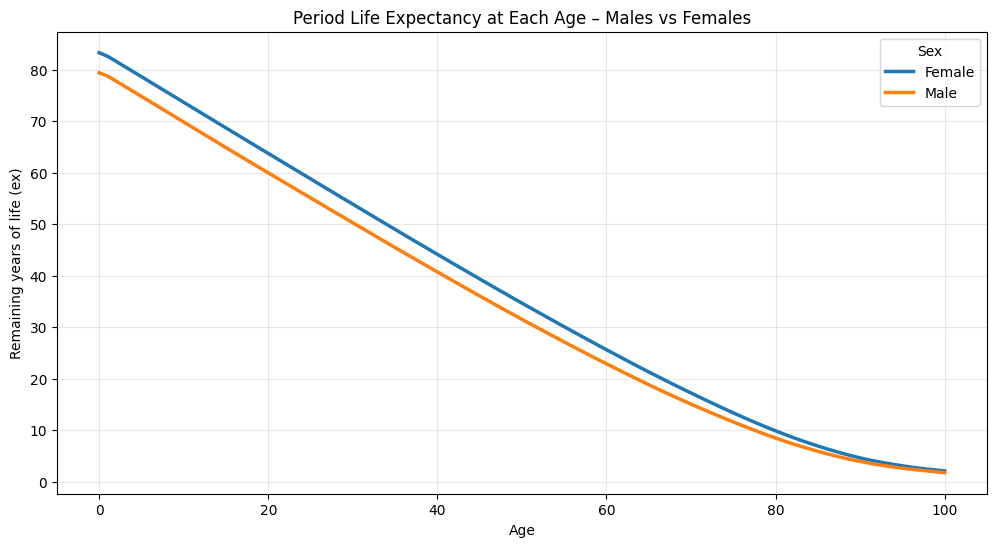

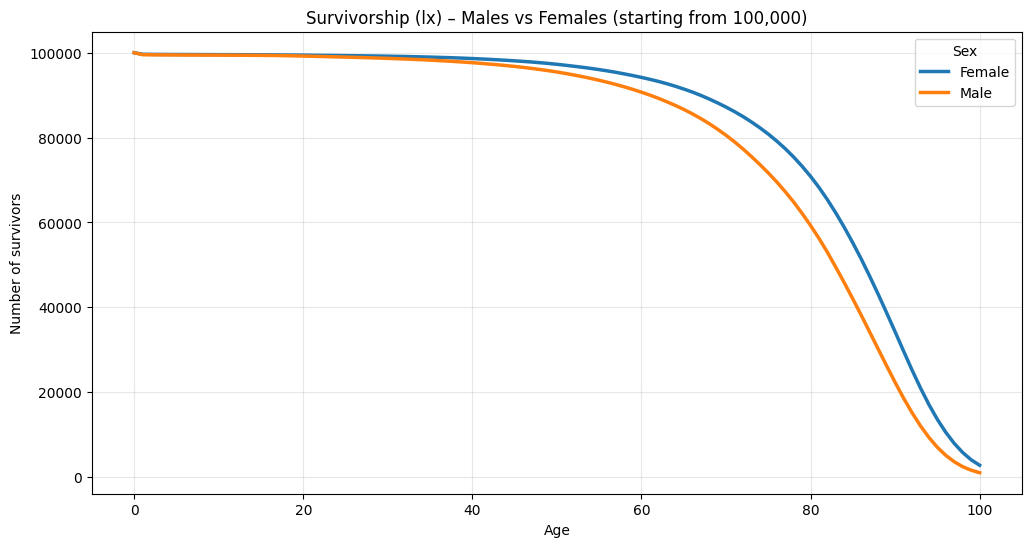

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_le, x='age', y='ex', hue='sex', linewidth=2.5)
plt.title('Period Life Expectancy at Each Age – Males vs Females')
plt.xlabel('Age')
plt.ylabel('Remaining years of life (ex)')
plt.grid(True, alpha=0.3)
plt.legend(title='Sex')
plt.show()

# Survivorship curve
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_le, x='age', y='lx', hue='sex', linewidth=2.5)
plt.title('Survivorship (lx) – Males vs Females (starting from 100,000)')
plt.xlabel('Age')
plt.ylabel('Number of survivors')
plt.grid(True, alpha=0.3)
plt.legend(title='Sex')
plt.show()

In [ ]:
print(deprivation_df.columns.tolist())
print(deprivation_df.head(5))

In [48]:
deprivation_df = deprivation_df.rename(columns={
    'Upper Tier Local Authority District name (2024)': 'Local_Authority',
    'IMD - Average score ': 'Deprivation_Score',
    'IMD - Average rank ': 'IMD_Avg_Rank',
    'IMD - Proportion of LSOAs in most deprived 10% nationally ': 'Deprived_10pct_Proportion'
})

# Quick clean
deprivation_df['Local_Authority'] = deprivation_df['Local_Authority'].str.strip()
print(deprivation_df[['Local_Authority', 'Deprivation_Score']].head(5))

        Local_Authority  Deprivation_Score
0            Hartlepool             37.580
1         Middlesbrough             40.037
2  Redcar and Cleveland             30.336
3      Stockton-on-Tees             25.830
4            Darlington             25.713
